In [1]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
WINDOW = 5

# Using All Weather Variables - Redundant

In [3]:
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
precip = weather_dataset.precipMM
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))

cols_to_remove = [heatindex + windchill + feelslike]
#cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
##cols_to_remove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cols_to_remove = [7, 9, 11]
#cols_to_remove = [0, 2, 4, 5, 7, 8, 9, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,dewPointC,windGustKmph,tempC_Rmean (window = 5),...,pressure_Rmax (window = 5),cloudcover_Rmean (window = 5),cloudcover_Rmin (window = 5),cloudcover_Rmax (window = 5),dewPointC_Rmean (window = 5),dewPointC_Rmin (window = 5),dewPointC_Rmax (window = 5),windGustKmph_Rmean (window = 5),windGustKmph_Rmin (window = 5),windGustKmph_Rmax (window = 5)
0,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.569311,0.285807,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.504407,0.334925,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.570513,0.227720,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.612179,0.173394,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.685897,0.150246,0.04651,...,0.775503,0.066781,0.0,0.333906,0.113862,0.0,0.569311,0.057161,0.0,0.285807


In [4]:
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
precip = weather_dataset.precipMM
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))

cols_to_remove = [heatindex + windchill + feelslike]
#cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
##cols_to_remove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cols_to_remove = [7, 9, 11]
#cols_to_remove = [0, 2, 4, 5, 7, 8, 9, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,dewPointC,windGustKmph,tempC_Rmean (window = 5),...,pressure_Rmax (window = 5),cloudcover_Rmean (window = 5),cloudcover_Rmin (window = 5),cloudcover_Rmax (window = 5),dewPointC_Rmean (window = 5),dewPointC_Rmin (window = 5),dewPointC_Rmax (window = 5),windGustKmph_Rmean (window = 5),windGustKmph_Rmin (window = 5),windGustKmph_Rmax (window = 5)
0,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.569311,0.285807,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.504407,0.334925,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.570513,0.227720,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.612179,0.173394,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.685897,0.150246,0.04651,...,0.775503,0.066781,0.0,0.333906,0.113862,0.0,0.569311,0.057161,0.0,0.285807


In [5]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = precip

## Bayesian Ridge Regression using train_test_split

In [6]:
# Create linear regression object with a ridge coefficient 0.5
b_ridge = BayesianRidge()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Train the model using the training sets
b_ridge.fit(X_train,Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [7]:
p = b_ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score 0.843210417125
RMSE 0.0262044278639


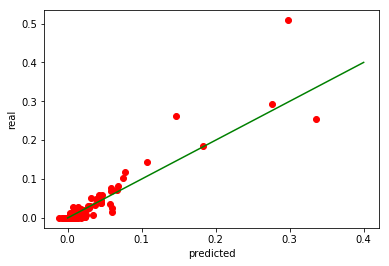

In [8]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# pl.savefig('wwo_model_results/bayesridge_all_scatterplot.png')

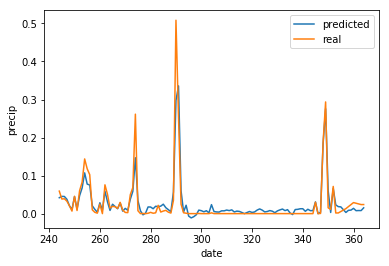

In [9]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

# pl.savefig('wwo_model_results/bayesridge_all_linegraph.png')

## Bayes Ridge Regression using 10-fold cross validation

In [10]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    b_ridge.fit(x_train, y_train)
    p = b_ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [11]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Ridge Regression
R2 score on training: 0.843210
RMSE on training: 0.026204
RMSE on 10-fold CV: 0.020543
